In [185]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

In [209]:
# load dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

Train: X = (60000, 28, 28), Y = (60000,)
Test: X = (10000, 28, 28), Y = (10000,)


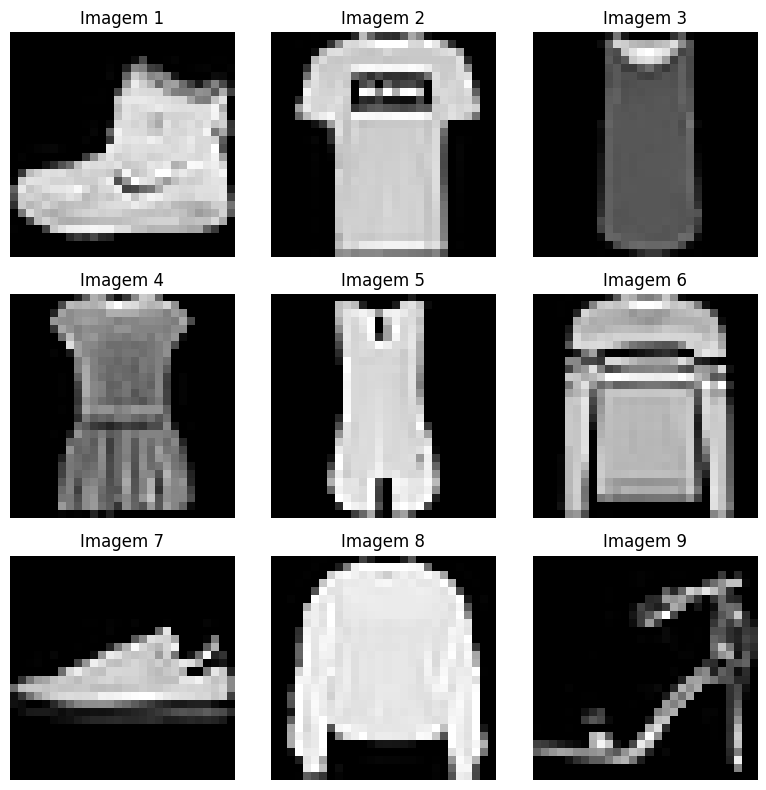

In [187]:
print("Train: X = %s, Y = %s" %(train_x.shape, train_y.shape))
print("Test: X = %s, Y = %s" %(test_x.shape, test_y.shape))

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_x[i], cmap='gray')
    ax.set_title(f'Imagem {i+1}')  
    ax.axis('off')  

plt.tight_layout()

plt.show()

In [210]:
# reshape to have a single channel
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [211]:
train_y_one_hot = to_categorical(train_y, num_classes=10)
test_y_one_hot = to_categorical(test_y, num_classes=10)

In [202]:
print(train_y_one_hot.shape)

(60000, 10)


In [212]:
train_x = (train_x.astype('float32'))/255.
test_x = (test_x.astype('float32'))/255.

The CNN model function:

In [192]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from keras.metrics import Precision, Recall

In [213]:
model = Sequential()

# camada de convolucao e pooling
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# flattening
model.add(Flatten())
# camada densa
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# camada de saida
model.add(Dense(10, activation='softmax'))

In [214]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [215]:
import numpy as np

train_y_integers = np.argmax(train_y_one_hot, axis=1)

In [216]:
hist = model.fit(train_x, train_y_integers, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3914 - accuracy: 0.8594
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2673 - accuracy: 0.9027
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2273 - accuracy: 0.9163
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1986 - accuracy: 0.9261
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1762 - accuracy: 0.9339
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1562 - accuracy: 0.9416
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1378 - accuracy: 0.9485
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1228 - accuracy: 0.9541
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1090 - accuracy: 0.9594
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [217]:
test_y_integers = np.argmax(test_y_one_hot, axis=1)

score = model.evaluate(test_x, test_y_integers, verbose=0)

In [218]:
print(score)

[0.31949475407600403, 0.9099000096321106]


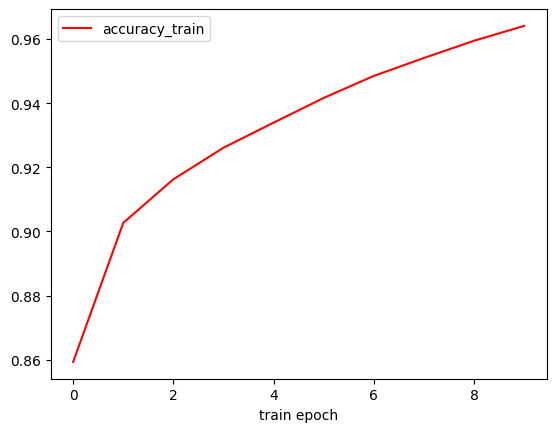

In [219]:
plt.plot(hist.epoch, hist.history['accuracy'], label='accuracy'+'_train', color='red')

plt.legend()
plt.xlabel('train epoch')
plt.show()

In [220]:
y_pred = model.predict(test_x)

predictions = [np.argmax(yi) for yi in y_pred]

313/313 [==============================] - 2s 5ms/step


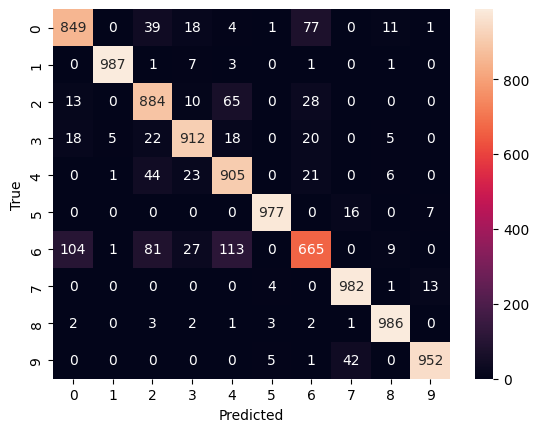

In [222]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_y, predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [223]:
model.save('fashion_model.h5')

/home/samuel/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
